# 1，展示结果，以各类ETF作为“股票池”

In [1]:
import cv_strategy
import pandas as pd

In [2]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

2023-02-07-10:01:43
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


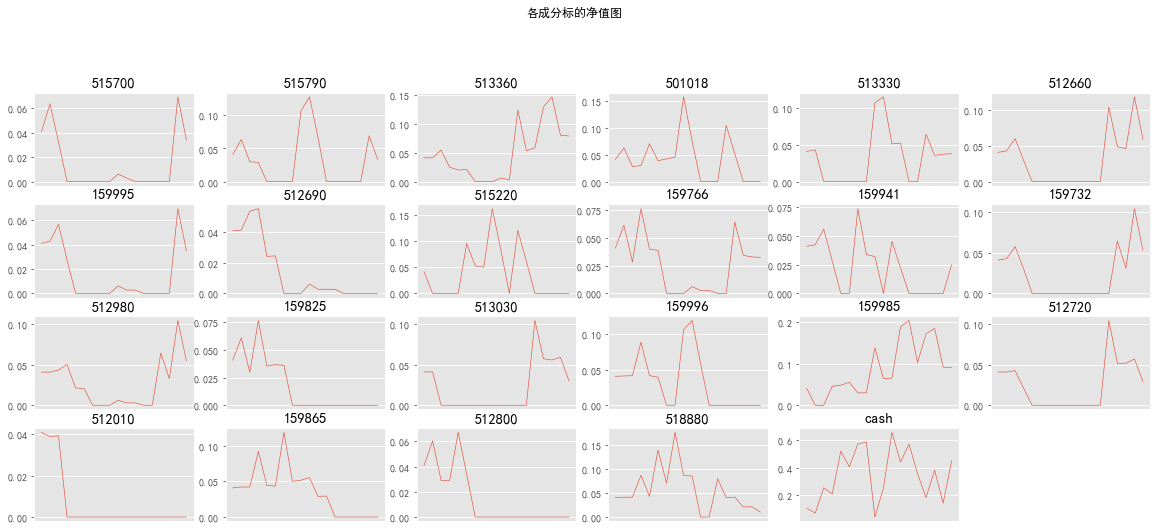

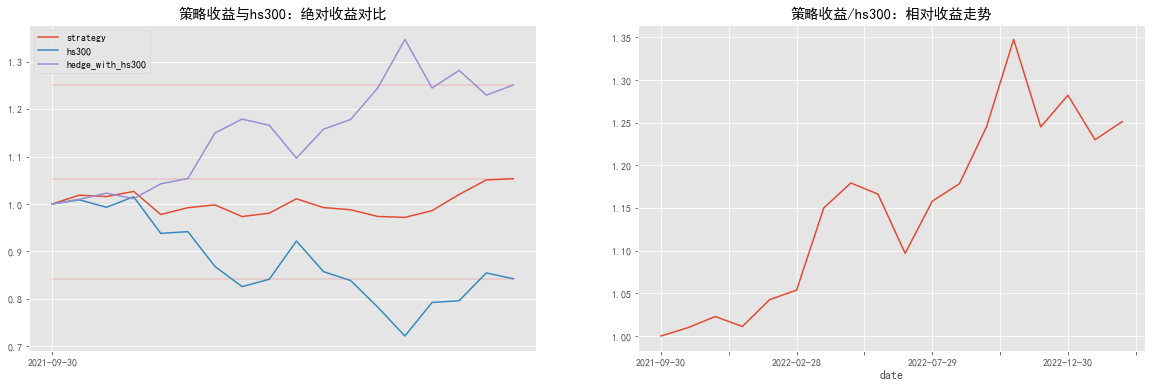

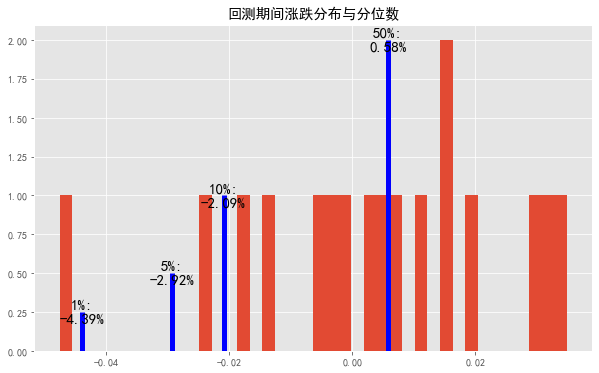

近5日组合净值：
date
2022-10-31    0.971615
2022-11-30     0.98581
2022-12-30    1.020145
2023-01-31    1.050691
2023-02-07     1.05339
dtype: object
近5日组合涨跌：
date
2022-10-31   -0.002002
2022-11-30    0.014610
2022-12-30    0.034830
2023-01-31    0.029943
2023-02-07    0.002569
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.427463  0.000000
159985  0.086175 -0.007028
513360  0.074587 -0.019031
512660  0.055933 -0.006975
512980   0.05222  0.051163
159732  0.049842  0.010029
513330  0.035876  0.018595
159995  0.033226  0.010338
515700  0.032295 -0.017989
515790  0.031524 -0.041420
159766  0.030911 -0.010195
513030   0.02838  0.014612
512720  0.027876  0.033476
159941  0.023594  0.051282
518880    0.0101 -0.014500
159825       0.0 -0.004454
515220       0.0  0.000445
159865       0.0  0.009804
159996       0.0 -0.002727
512800       0.0 -0.024346
512010       0.0 -0.015595
501018       0.0 -0.016623
512690       0.0 -0.007786


In [11]:
am.visualization(control_group='hs300')
# print(am.compare.pct_change().tail(5))

# 2，cv_strategy介绍

## 2.1：底层逻辑与参数介绍

cv，即变异系数，度量数据离散程度的一种方式，表达式如下。可以理解为“围绕平均值的合理波动范围”。例如 cv = 0.1, 即表示“大多数情况下，围绕均值的合理波动范围为±10%”
$$cv = \frac{标准差}{平均值}$$

以动态视角来理解cv：

当cv增加时（dcv > 0），数组有远离均值的趋势，此时如果数组最后一个数高于均值，则可理解为“数组在增长过程中远离均值”此时建议增加该类资产配置。而如果数组最后一个值小于均值，且dcv > 0，则意味着“数组在下降过程中远离均值”，此时建议及时止损。

而当cv减小时（dcv < 0），数组有向均值靠拢的趋势。此时如果最新值大于均值，则意味着上升动能不足，此时选择撤出部分投资，以降低该类资产对整体组合带来的波动。而当最新值小于均值，则意味着资产价格快速下跌的趋势结束，但并不等同于资产价格回升，资产仍有可能缓慢下降或企稳筑底，此时如果选择抄底并不稳妥，建议观望或在有很大把握的情况下适当参与。

据上所述，策略中相应设置了3个参数：


$买入比例：\frac{4}{标的池中标的数量} (默认值，表示“在当前时点，如果标的池中有1/4的标的出现买入信号，则会花光所有现金用于加仓”)$


$收益增强比例：0.5（默认值，表示当上升行情结束后，撤出当前持仓的1/2以降低波动对整体组合的影响）$


$止损比例：1（默认值，表示当资产出现下跌情况后，卖出当前持仓的全部以止损）$

## 2.2：以沪深300指数的可视化说明

In [8]:
import tushare as ts
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
hs300 = ts.get_k_data('hs300').set_index('date')['close']
hs300_ma50 = hs300.rolling(50).mean()
hs300_std50 = hs300.rolling(50).std()
hs300_cv50 = hs300_std50/hs300_ma50

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


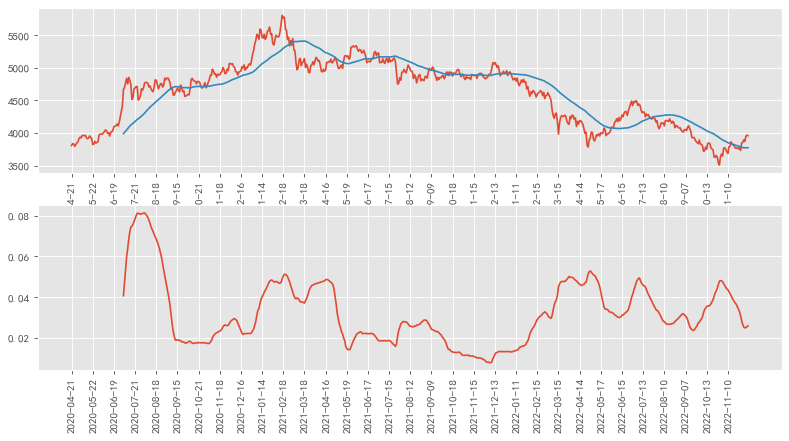

In [16]:
plt.figure(figsize=[12,6],dpi=80)
ax1 = plt.subplot(211)
ax1.plot(hs300)
ax1.plot(hs300_ma50)
ax1.set_xticks(hs300.index[::20])
ax1.set_xticklabels(hs300.index[::20],rotation=90)

ax2=plt.subplot(212,sharex=ax1)
ax2.plot(hs300_cv50)
ax2.set_xticks(hs300.index[::20])
ax2.set_xticklabels(hs300.index[::20],rotation=90)

plt.show()

# 3，经cv_strategy优化后的曲线：

对难以控制的资产类别可降低波动率；对强势的资产不仍有较好收益；对风险较大的资产可及时撤出

以沪深300指数、比亚迪（002594）、恒瑞医药（600276）为例，可以明显看出策略对于控制波动方面有显著作用

## 3.1：对难以把握的资产：降低波动、增加可控性：沪深300指数

In [30]:
pool='600519'
test_pool = [pool]
test = cv_strategy.cv_strategy(test_pool)
test.get_close(date_start = '2015-01-01',ktype_='D')

2023-02-06-10:54:04
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


2015-03-23
无操作: 600519
2015-03-24
无操作: 600519
2015-03-25
无操作: 600519
2015-03-26
买——追涨： 600519
2015-03-27
无操作: 600519
2015-03-30
无操作: 600519
2015-03-31
无操作: 600519
2015-04-01
无操作: 600519
2015-04-02
无操作: 600519
2015-04-03
无操作: 600519
2015-04-07
无操作: 600519
2015-04-08
无操作: 600519
2015-04-09
无操作: 600519
2015-04-10
无操作: 600519
2015-04-13
无操作: 600519
2015-04-14
无操作: 600519
2015-04-15
无操作: 600519
2015-04-16
无操作: 600519
2015-04-17
无操作: 600519
2015-04-20
无操作: 600519
2015-04-21
无操作: 600519
2015-04-22
无操作: 600519
2015-04-23
无操作: 600519
2015-04-24
无操作: 600519
2015-04-27
无操作: 600519
2015-04-28
无操作: 600519
2015-04-29
无操作: 600519
2015-04-30
无操作: 600519
2015-05-04
无操作: 600519
2015-05-05
卖——逃顶： 600519
2015-05-06
无操作: 600519
2015-05-07
无操作: 600519
2015-05-08
无操作: 600519
2015-05-11
买——追涨： 600519
2015-05-12
卖——逃顶： 600519
2015-05-13
无操作: 600519
2015-05-14
无操作: 600519
2015-05-15
无操作: 600519
2015-05-18
无操作: 600519
2015-05-19
无操作: 600519
2015-05-20
无操作: 600519
2015-05-21
无操作: 600519
2015-05-22
买——追涨： 600519
2

无操作: 600519
2016-12-29
无操作: 600519
2016-12-30
无操作: 600519
2017-01-03
无操作: 600519
2017-01-04
买——追涨： 600519
2017-01-05
无操作: 600519
2017-01-06
无操作: 600519
2017-01-09
无操作: 600519
2017-01-10
无操作: 600519
2017-01-11
无操作: 600519
2017-01-12
无操作: 600519
2017-01-13
无操作: 600519
2017-01-16
无操作: 600519
2017-01-17
无操作: 600519
2017-01-18
无操作: 600519
2017-01-19
无操作: 600519
2017-01-20
无操作: 600519
2017-01-23
无操作: 600519
2017-01-24
卖——逃顶： 600519
2017-01-25
无操作: 600519
2017-01-26
无操作: 600519
2017-02-03
无操作: 600519
2017-02-06
无操作: 600519
2017-02-07
无操作: 600519
2017-02-08
无操作: 600519
2017-02-09
无操作: 600519
2017-02-10
无操作: 600519
2017-02-13
无操作: 600519
2017-02-14
无操作: 600519
2017-02-15
无操作: 600519
2017-02-16
无操作: 600519
2017-02-17
无操作: 600519
2017-02-20
买——追涨： 600519
2017-02-21
卖——逃顶： 600519
2017-02-22
买——追涨： 600519
2017-02-23
无操作: 600519
2017-02-24
无操作: 600519
2017-02-27
无操作: 600519
2017-02-28
卖——逃顶： 600519
2017-03-01
买——追涨： 600519
2017-03-02
卖——逃顶： 600519
2017-03-03
无操作: 600519
2017-03-06
无操作: 600519
2017-0

2018-10-22
买——追涨： 600519
2018-10-23
卖——逃顶： 600519
2018-10-24
无操作: 600519
2018-10-25
无操作: 600519
2018-10-26
无操作: 600519
2018-10-29
无操作: 600519
2018-10-30
无操作: 600519
2018-10-31
无操作: 600519
2018-11-01
无操作: 600519
2018-11-02
无操作: 600519
2018-11-05
无操作: 600519
2018-11-06
无操作: 600519
2018-11-07
无操作: 600519
2018-11-08
无操作: 600519
2018-11-09
无操作: 600519
2018-11-12
无操作: 600519
2018-11-13
无操作: 600519
2018-11-14
无操作: 600519
2018-11-15
无操作: 600519
2018-11-16
无操作: 600519
2018-11-19
无操作: 600519
2018-11-20
无操作: 600519
2018-11-21
无操作: 600519
2018-11-22
无操作: 600519
2018-11-23
无操作: 600519
2018-11-26
无操作: 600519
2018-11-27
无操作: 600519
2018-11-28
无操作: 600519
2018-11-29
无操作: 600519
2018-11-30
无操作: 600519
2018-12-03
无操作: 600519
2018-12-04
无操作: 600519
2018-12-05
无操作: 600519
2018-12-06
无操作: 600519
2018-12-07
无操作: 600519
2018-12-10
无操作: 600519
2018-12-11
无操作: 600519
2018-12-12
无操作: 600519
2018-12-13
无操作: 600519
2018-12-14
无操作: 600519
2018-12-17
无操作: 600519
2018-12-18
无操作: 600519
2018-12-19
无操作: 600519
2018-12

无操作: 600519
2020-08-10
无操作: 600519
2020-08-11
无操作: 600519
2020-08-12
无操作: 600519
2020-08-13
无操作: 600519
2020-08-14
无操作: 600519
2020-08-17
无操作: 600519
2020-08-18
无操作: 600519
2020-08-19
无操作: 600519
2020-08-20
无操作: 600519
2020-08-21
无操作: 600519
2020-08-24
无操作: 600519
2020-08-25
无操作: 600519
2020-08-26
无操作: 600519
2020-08-27
无操作: 600519
2020-08-28
无操作: 600519
2020-08-31
无操作: 600519
2020-09-01
无操作: 600519
2020-09-02
无操作: 600519
2020-09-03
无操作: 600519
2020-09-04
无操作: 600519
2020-09-07
无操作: 600519
2020-09-08
无操作: 600519
2020-09-09
无操作: 600519
2020-09-10
无操作: 600519
2020-09-11
无操作: 600519
2020-09-14
无操作: 600519
2020-09-15
买——追涨： 600519
2020-09-16
无操作: 600519
2020-09-17
卖——逃顶： 600519
2020-09-18
无操作: 600519
2020-09-21
无操作: 600519
2020-09-22
无操作: 600519
2020-09-23
无操作: 600519
2020-09-24
无操作: 600519
2020-09-25
卖——割肉： 600519
2020-09-28
无操作: 600519
2020-09-29
无操作: 600519
2020-09-30
无操作: 600519
2020-10-09
无操作: 600519
2020-10-12
无操作: 600519
2020-10-13
无操作: 600519
2020-10-14
买——追涨： 600519
2020-10-15
卖——

无操作: 600519
2022-03-18
无操作: 600519
2022-03-21
无操作: 600519
2022-03-22
无操作: 600519
2022-03-23
无操作: 600519
2022-03-24
无操作: 600519
2022-03-25
无操作: 600519
2022-03-28
无操作: 600519
2022-03-29
无操作: 600519
2022-03-30
无操作: 600519
2022-03-31
无操作: 600519
2022-04-01
无操作: 600519
2022-04-06
无操作: 600519
2022-04-07
无操作: 600519
2022-04-08
无操作: 600519
2022-04-11
无操作: 600519
2022-04-12
无操作: 600519
2022-04-13
无操作: 600519
2022-04-14
无操作: 600519
2022-04-15
无操作: 600519
2022-04-18
无操作: 600519
2022-04-19
无操作: 600519
2022-04-20
无操作: 600519
2022-04-21
无操作: 600519
2022-04-22
无操作: 600519
2022-04-25
无操作: 600519
2022-04-26
无操作: 600519
2022-04-27
无操作: 600519
2022-04-28
无操作: 600519
2022-04-29
无操作: 600519
2022-05-05
无操作: 600519
2022-05-06
无操作: 600519
2022-05-09
无操作: 600519
2022-05-10
无操作: 600519
2022-05-11
无操作: 600519
2022-05-12
无操作: 600519
2022-05-13
无操作: 600519
2022-05-16
无操作: 600519
2022-05-17
无操作: 600519
2022-05-18
无操作: 600519
2022-05-19
无操作: 600519
2022-05-20
买——追涨： 600519
2022-05-23
卖——逃顶： 600519
2022-05-24
买——追涨： 

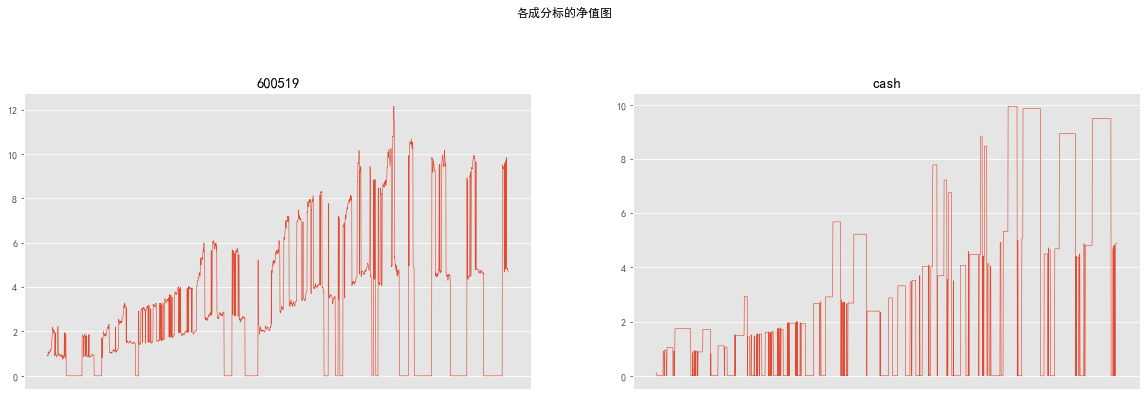

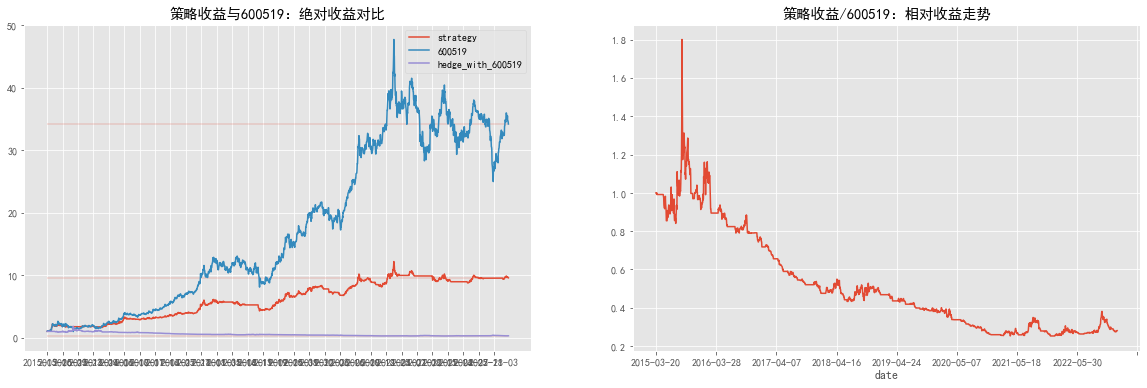

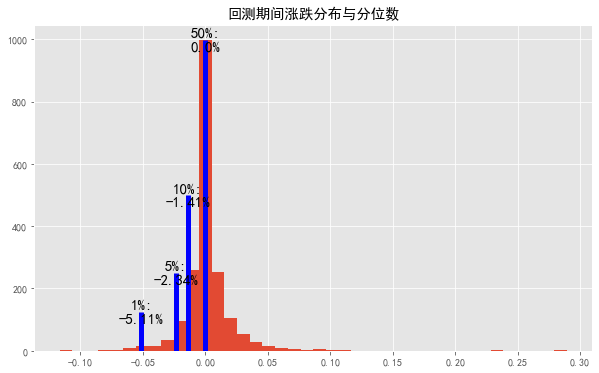

近5日组合净值：
date
2023-01-30    9.731597
2023-01-31    9.622847
2023-02-01    9.620813
2023-02-02    9.598002
2023-02-03    9.551376
dtype: object
近5日组合涨跌：
date
2023-01-30    0.007460
2023-01-31   -0.011175
2023-02-01   -0.000211
2023-02-02   -0.002371
2023-02-03   -0.004858
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.509956  0.000000
600519  0.490044 -0.009863


In [31]:
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50,)
test.visualization(control_group=pool)

## 3.2：对强势资产：降低波动同时对收益影响不大：比亚迪

In [31]:
test_pool = ['002594']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(date_start='2019-01-01')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2022-12-08-10:02:02
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2019-03-20
买——追涨： 002594
2019-03-21
无操作: 002594
2019-03-22
无操作: 002594
2019-03-25
无操作: 002594
2019-03-26
无操作: 002594
2019-03-27
无操作: 002594
2019-03-28
卖——逃顶： 002594
2019-03-29
无操作: 002594
2019-04-01
无操作: 002594
2019-04-02
无操作: 002594
2019-04-03
无操作: 002594
2019-04-04
无操作: 002594
2019-04-08
无操作: 002594
2019-04-09
无操作: 002594
2019-04-10
无操作: 002594
2019-04-11
无操作: 002594
2019-04-12
无操作: 002594
2019-04-15
无操作: 002594
2019-04-16
无操作: 002594
2019-04-17
买——追涨： 002594
2019-04-18
卖——逃顶： 002594
2019-04-19
无操作: 002594
2019-04-22
无操作: 002594
2019-04-23
无操作: 002594
2019-04-24
无操作: 002594
2019-04-25
无操作: 002594
2019-04-26
无操作: 002594
2019-04-29
无操作: 002594
2019-04-30
无操作: 002594
2019-05-06
无操作: 002594
2019-05-07
无操作: 002594
2019-05-08
卖——割肉： 002594
2019-05-09
无操作: 002594
2019-05-10
无操作: 002594
2019-05-13
无操作: 002594
2019-05-14
无操作: 002594
2019-05-15
无操作: 002594
2019-05-16
无操作:

无操作: 002594
2020-09-09
无操作: 002594
2020-09-10
无操作: 002594
2020-09-11
无操作: 002594
2020-09-14
买——追涨： 002594
2020-09-15
无操作: 002594
2020-09-16
无操作: 002594
2020-09-17
无操作: 002594
2020-09-18
无操作: 002594
2020-09-21
无操作: 002594
2020-09-22
无操作: 002594
2020-09-23
无操作: 002594
2020-09-24
无操作: 002594
2020-09-25
无操作: 002594
2020-09-28
无操作: 002594
2020-09-29
无操作: 002594
2020-09-30
无操作: 002594
2020-10-09
无操作: 002594
2020-10-12
无操作: 002594
2020-10-13
无操作: 002594
2020-10-14
无操作: 002594
2020-10-15
无操作: 002594
2020-10-16
无操作: 002594
2020-10-19
无操作: 002594
2020-10-20
无操作: 002594
2020-10-21
无操作: 002594
2020-10-22
无操作: 002594
2020-10-23
无操作: 002594
2020-10-26
无操作: 002594
2020-10-27
无操作: 002594
2020-10-28
无操作: 002594
2020-10-29
无操作: 002594
2020-10-30
无操作: 002594
2020-11-02
无操作: 002594
2020-11-03
无操作: 002594
2020-11-04
无操作: 002594
2020-11-05
无操作: 002594
2020-11-06
无操作: 002594
2020-11-09
无操作: 002594
2020-11-10
无操作: 002594
2020-11-11
卖——逃顶： 002594
2020-11-12
无操作: 002594
2020-11-13
无操作: 002594
2020-11-16
无操作: 00

无操作: 002594
2022-07-19
无操作: 002594
2022-07-20
无操作: 002594
2022-07-21
无操作: 002594
2022-07-22
无操作: 002594
2022-07-25
无操作: 002594
2022-07-26
无操作: 002594
2022-07-27
无操作: 002594
2022-07-28
无操作: 002594
2022-07-29
无操作: 002594
2022-08-01
无操作: 002594
2022-08-02
无操作: 002594
2022-08-03
无操作: 002594
2022-08-04
无操作: 002594
2022-08-05
无操作: 002594
2022-08-08
无操作: 002594
2022-08-09
无操作: 002594
2022-08-10
无操作: 002594
2022-08-11
无操作: 002594
2022-08-12
无操作: 002594
2022-08-15
卖——割肉： 002594
2022-08-16
无操作: 002594
2022-08-17
无操作: 002594
2022-08-18
无操作: 002594
2022-08-19
无操作: 002594
2022-08-22
无操作: 002594
2022-08-23
无操作: 002594
2022-08-24
无操作: 002594
2022-08-25
无操作: 002594
2022-08-26
无操作: 002594
2022-08-29
无操作: 002594
2022-08-30
无操作: 002594
2022-08-31
无操作: 002594
2022-09-01
无操作: 002594
2022-09-02
无操作: 002594
2022-09-05
无操作: 002594
2022-09-06
无操作: 002594
2022-09-07
无操作: 002594
2022-09-08
无操作: 002594
2022-09-09
无操作: 002594
2022-09-13
无操作: 002594
2022-09-14
无操作: 002594
2022-09-15
无操作: 002594
2022-09-16
无操作: 0025

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


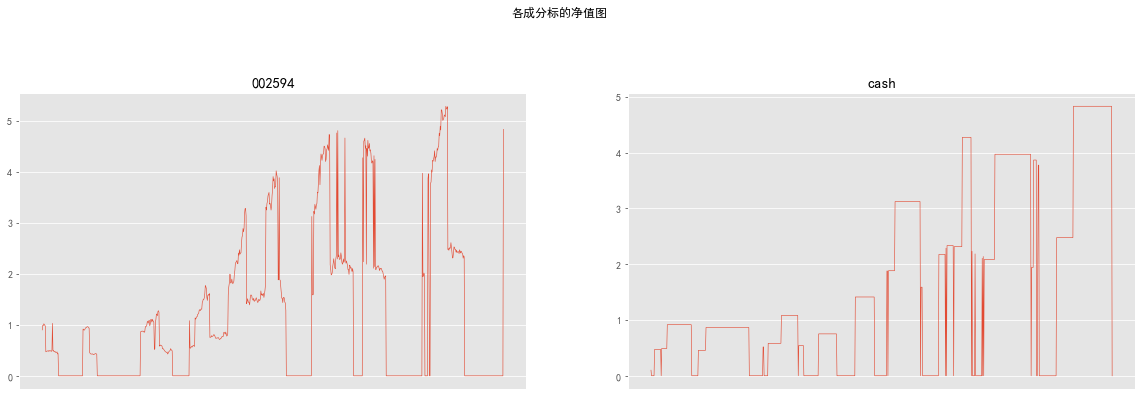

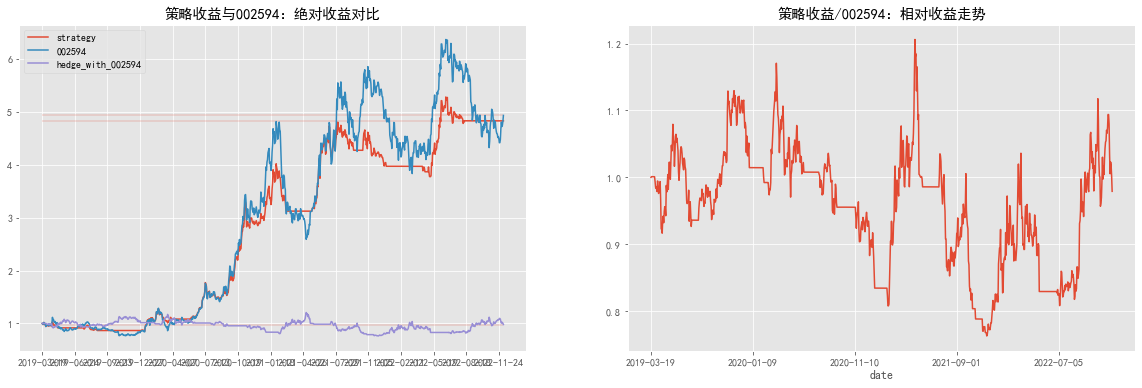

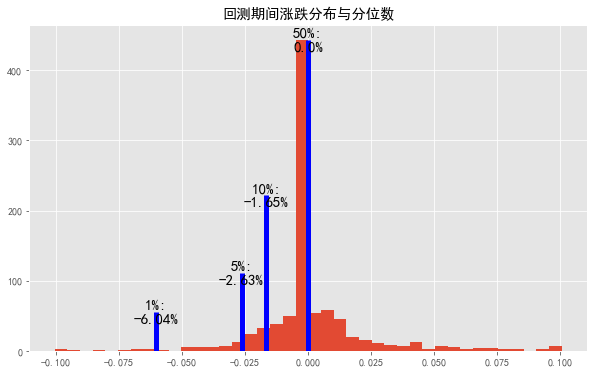

近5日组合净值：
date
2022-12-01    4.832893
2022-12-02    4.832893
2022-12-05    4.832893
2022-12-06    4.832893
2022-12-07    4.831443
dtype: object
近5日组合涨跌：
date
2022-12-01    0.0000
2022-12-02    0.0000
2022-12-05    0.0000
2022-12-06    0.0000
2022-12-07   -0.0003
dtype: float64
今日持仓比例与涨跌幅：
            仓位      今日涨幅
002594  1.0003  0.022945
cash   -0.0003  0.000000


In [32]:
test.visualization(control_group='002594')

## 3.3：对弱势资产：有限参与，保证安全：恒瑞医药

In [39]:
test_pool = ['600276']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(ktype_='D')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2022-12-08-12:12:27
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2020-07-07
买——追涨： 600276
2020-07-08
无操作: 600276
2020-07-09
无操作: 600276
2020-07-10
无操作: 600276
2020-07-13
无操作: 600276
2020-07-14
无操作: 600276
2020-07-15
无操作: 600276
2020-07-16
卖——逃顶： 600276
2020-07-17
买——追涨： 600276
2020-07-20
无操作: 600276
2020-07-21
无操作: 600276
2020-07-22
无操作: 600276
2020-07-23
无操作: 600276
2020-07-24
卖——逃顶： 600276
2020-07-27
无操作: 600276
2020-07-28
无操作: 600276
2020-07-29
无操作: 600276
2020-07-30
无操作: 600276
2020-07-31
无操作: 600276
2020-08-03
无操作: 600276
2020-08-04
无操作: 600276
2020-08-05
无操作: 600276
2020-08-06
无操作: 600276
2020-08-07
无操作: 600276
2020-08-10
无操作: 600276
2020-08-11
无操作: 600276
2020-08-12
无操作: 600276
2020-08-13
无操作: 600276
2020-08-14
无操作: 600276
2020-08-17
无操作: 600276
2020-08-18
无操作: 600276
2020-08-19
无操作: 600276
2020-08-20
无操作: 600276
2020-08-21
无操作: 600276
2020-08-24
无操作: 600276
2020-08-25
无操作: 600276
2020-08-26
无操作: 600276
2020-08-27
无操作: 6

无操作: 600276
2021-12-29
无操作: 600276
2021-12-30
无操作: 600276
2021-12-31
无操作: 600276
2022-01-04
无操作: 600276
2022-01-05
无操作: 600276
2022-01-06
无操作: 600276
2022-01-07
无操作: 600276
2022-01-10
无操作: 600276
2022-01-11
无操作: 600276
2022-01-12
无操作: 600276
2022-01-13
无操作: 600276
2022-01-14
无操作: 600276
2022-01-17
无操作: 600276
2022-01-18
无操作: 600276
2022-01-19
无操作: 600276
2022-01-20
无操作: 600276
2022-01-21
无操作: 600276
2022-01-24
无操作: 600276
2022-01-25
无操作: 600276
2022-01-26
无操作: 600276
2022-01-27
无操作: 600276
2022-01-28
无操作: 600276
2022-02-07
无操作: 600276
2022-02-08
无操作: 600276
2022-02-09
无操作: 600276
2022-02-10
无操作: 600276
2022-02-11
无操作: 600276
2022-02-14
无操作: 600276
2022-02-15
无操作: 600276
2022-02-16
无操作: 600276
2022-02-17
无操作: 600276
2022-02-18
无操作: 600276
2022-02-21
无操作: 600276
2022-02-22
无操作: 600276
2022-02-23
无操作: 600276
2022-02-24
无操作: 600276
2022-02-25
无操作: 600276
2022-02-28
无操作: 600276
2022-03-01
无操作: 600276
2022-03-02
无操作: 600276
2022-03-03
无操作: 600276
2022-03-04
无操作: 600276
2022-03-07
无操作: 600276

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


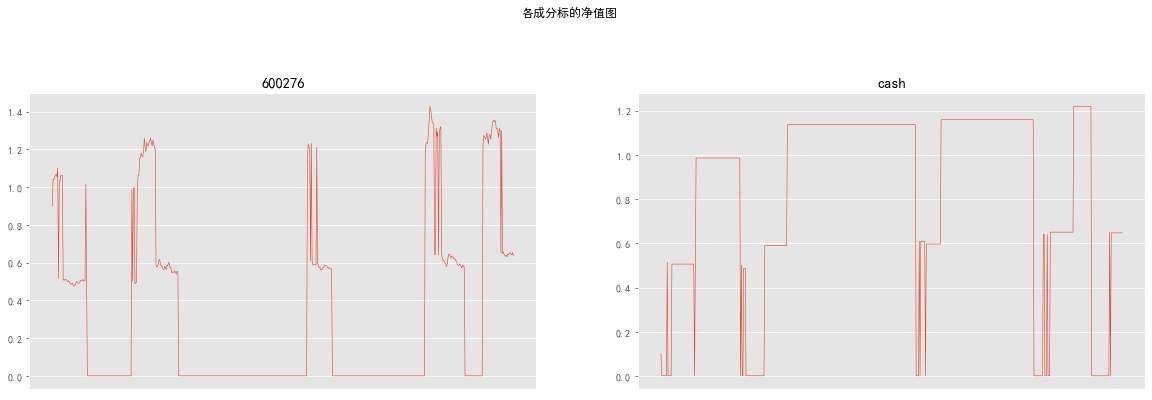

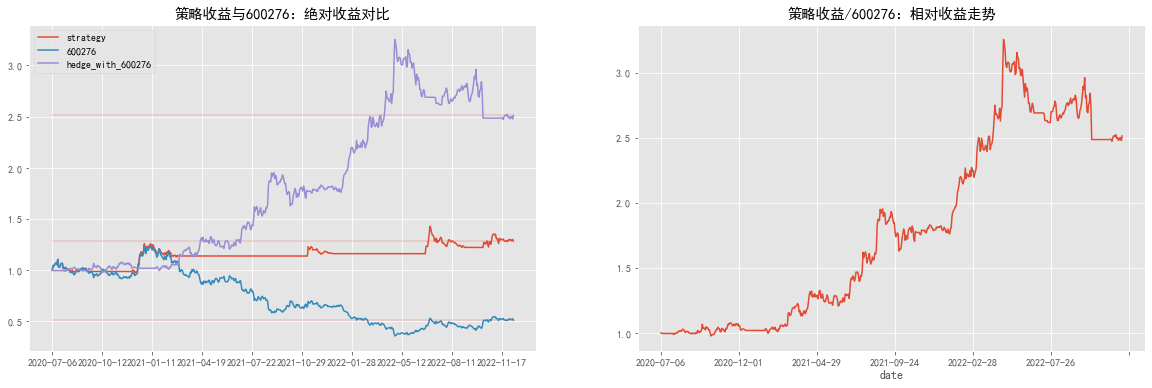

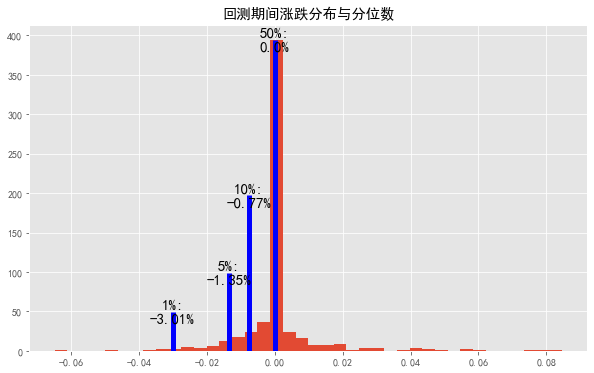

近5日组合净值：
date
2022-12-02    1.300025
2022-12-05    1.290043
2022-12-06    1.290043
2022-12-07    1.301313
2022-12-08    1.283603
dtype: object
近5日组合涨跌：
date
2022-12-02    0.000372
2022-12-05   -0.007678
2022-12-06    0.000000
2022-12-07    0.008736
2022-12-08   -0.013610
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.504803  0.000000
600276  0.495197 -0.027107


In [40]:
test.visualization(control_group='600276')

# 4，总结

基于变异系数的策略cv_strategy通过判断一个周期内的波动变化$\frac{dcv}{dt}$结合最新资产价格与过去一段时间的均值的大小关系来推测未来的资产价格走势，对波动增强且价格高于均值的资产超配，对波动增加且价格低于均值的资产减配，其他情况则维持安全的持仓比例，即“半仓吃瓜”

策略对于风格变化快、难以把握的资产类型可以降低其波动幅度，从而减小该资产对整体组合的影响；

策略对于强势的资产，能同时起到降低波动幅度和争取收益的效果；

策略对于弱势的资产，能起到控制最大回撤，减少参与、避免踩雷的效果。

当股票池足够丰富，策略的胜率也会随之提升。

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\HP\anaconda3\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


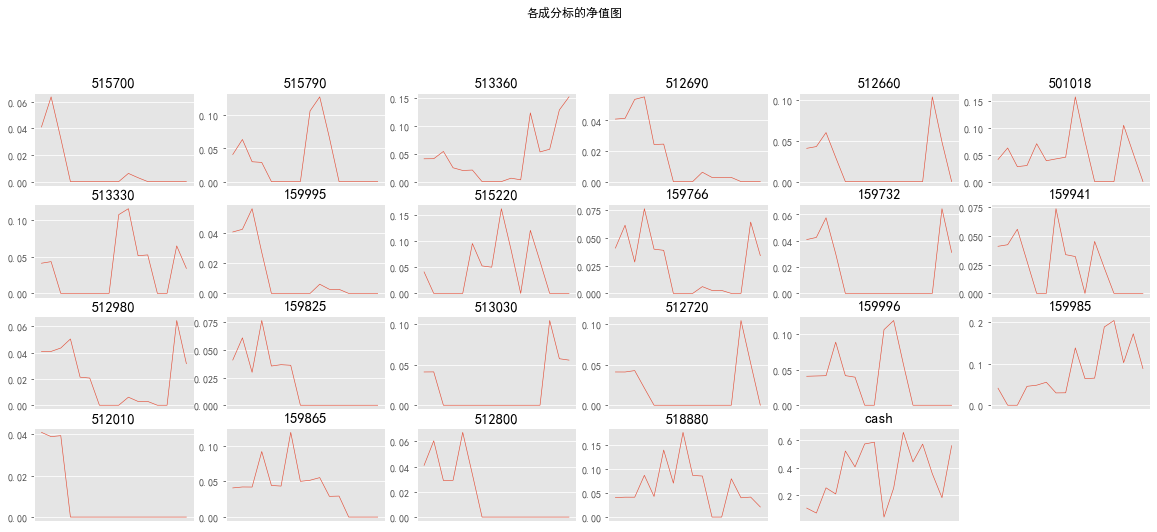

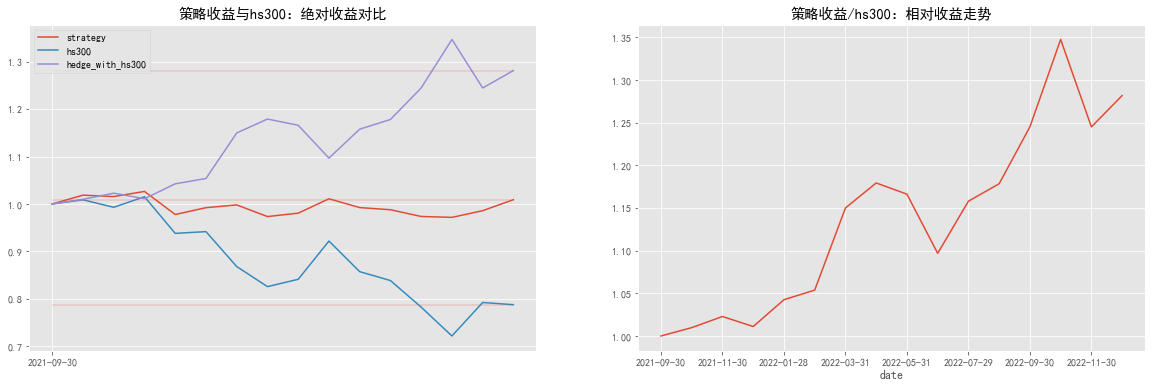

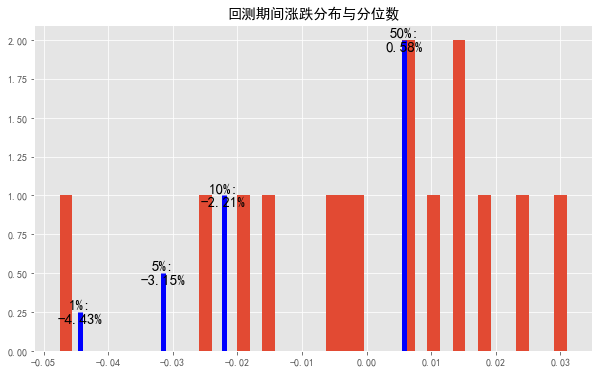

近5日组合净值：
date
2022-08-31    0.987758
2022-09-30    0.973564
2022-10-31    0.971615
2022-11-30     0.98581
2022-12-21     1.00897
dtype: object
近5日组合涨跌：
date
2022-08-31   -0.004583
2022-09-30   -0.014371
2022-10-31   -0.002002
2022-11-30    0.014610
2022-12-21    0.023493
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.556501  0.000000
513360  0.150797  0.183190
159985  0.087194  0.026231
513030  0.054992 -0.030103
159766  0.033813  0.059659
513330  0.033581  0.052381
512980  0.031311 -0.018739
159732  0.030875 -0.032407
518880  0.020936  0.009381
501018       0.0 -0.035211
512010       0.0 -0.025862
512660       0.0 -0.069665
159996       0.0  0.002973
512720       0.0 -0.041627
512800       0.0 -0.013121
159995       0.0 -0.023099
159941       0.0 -0.037736
159865       0.0 -0.030303
159825       0.0 -0.010453
515220       0.0 -0.085185
515700       0.0 -0.021834
515790       0.0 -0.096061
512690       0.0  0.100796


In [119]:
am.visualization()

In [7]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.close.loc[:'2022-12-26','515220'] = am.close.loc[:'2022-12-26','515220']/2.187*2.147

am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

a = cv_strategy.cv_strategy(pool_1)
a.get_close(ktype_='D')
a.close.loc['2022-07-05':,'159941']=a.close.loc['2022-07-05':,'159941']/0.604*2.416
a.close.loc[:'2021-05-14','512690'] = a.close.loc[:'2021-05-14','512690']/2.644*0.972
a.close.loc['2021-05-15':'2021-12-30','512690'] = a.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
a.close.loc[:'2021-06-25','512010'] = a.close.loc[:'2021-06-25','512010']/3.206*0.836
a.close.loc[:'2022-12-26','515220'] = a.close.loc[:'2022-12-26','515220']/2.187*2.147

a.run()

2023-02-07-10:40:39
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-01-10
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
卖——逃顶： 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
卖——逃顶： 513030
无操作: 159985
无操作: 159825
卖——逃顶： 512800
无操作: 518880
2022-01-11
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
卖——逃顶： 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
卖——逃顶： 159825
无操作: 512800
无操作: 518880
2022-01-12
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
买——追涨： 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
买——追涨： 159825
无操作: 512800
无操作: 518880
2022-01-13
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
卖——逃顶： 512980
无操作: 515220
无操作: 159995
无操作:

买——追涨： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
买——追涨： 512800
无操作: 518880
2022-04-07
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
卖——逃顶： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
卖——逃顶： 512800
无操作: 518880
2022-04-08
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-04-11
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-04-12
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980


无操作: 513360
无操作: 515700
无操作: 513330
卖——逃顶： 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-05-25
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-05-26
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
买——追涨： 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-05-27
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作

无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
买——追涨： 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-08-10
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
卖——逃顶： 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-08-11
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
买——追涨： 159995
买——追涨： 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-08-12
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
卖——逃顶： 159995
卖——逃顶： 159732
卖——逃顶： 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 

2022-11-02
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
卖——逃顶： 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
卖——逃顶： 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-11-03
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
卖——逃顶： 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-11-04
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
买——追涨： 512660
无操作: 501018
买——追涨： 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-11-07
无操作: 513360
无操作: 515700
无操作: 513330
无操作: 515790
无操作: 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
卖——逃顶： 512660
无操作: 501018
无操作: 159766
无操作: 512

买——追涨： 512980
无操作: 515220
买——追涨： 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-01-20
买——追涨： 513360
买——追涨： 515700
无操作: 513330
无操作: 515790
无操作: 512690
卖——逃顶： 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
无操作: 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-01-30
卖——逃顶： 513360
无操作: 515700
无操作: 513330
买——追涨： 515790
无操作: 512690
无操作: 512980
无操作: 515220
卖——逃顶： 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
无操作: 512010
买——追涨： 159941
无操作: 512720
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
卖——逃顶： 512800
无操作: 518880
2023-01-31
无操作: 513360
无操作: 515700
无操作: 513330
卖——逃顶： 515790
卖——逃顶： 512690
无操作: 512980
无操作: 515220
无操作: 159995
无操作: 159732
无操作: 512660
无操作: 501018
无操作: 159766
卖——逃顶： 512010
卖——逃顶： 159941
卖——逃顶： 512720
无操作: 159865
卖——逃顶： 159996

In [8]:
startdate='2023-01-31'
dec_dailyreturn = a.returns.dropna().loc[startdate:]
df_model = a.weight.loc[am.weight.iloc[-2].name:]
df = pd.DataFrame(index = df_model.index,columns=df_model.columns)
df.iloc[0,:] = am.weight.iloc[-2][df.columns]

In [9]:
#####
for i in range(1,len(df)):

    df.iloc[i,:] = df.iloc[i-1,:]*(1+dec_dailyreturn.iloc[i,:])[df.columns]
    
    
###########
import tushare as ts
dfsum = pd.DataFrame(df.T.sum(),columns=['cv_m'])
hs300 = ts.get_k_data('hs300').set_index('date')
hs300 = hs300.loc[startdate:,'close']
dfs = pd.concat([df.T.sum(),hs300],axis=1)
dfs.columns=['cv_m','hs300']
dfs=dfs/dfs.iloc[0]

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


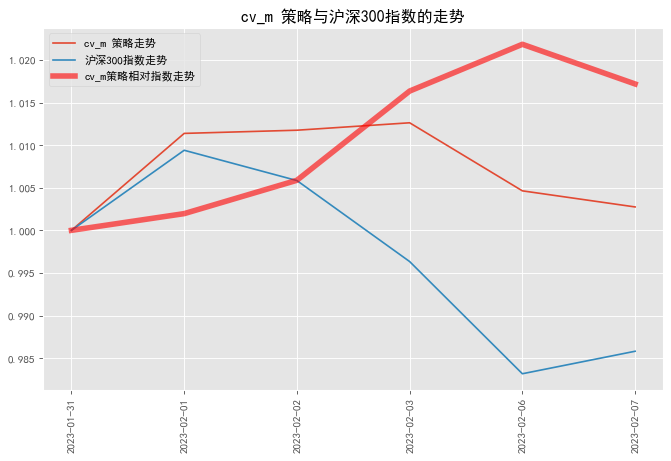

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=[10,6],dpi=80)
plt.title('cv_m 策略与沪深300指数的走势')
plt.plot(dfs.cv_m,label='cv_m 策略走势')
plt.plot(dfs.hs300,label='沪深300指数走势')
plt.plot(dfs.cv_m/dfs.hs300,lw=5,alpha=0.6,color='red',label='cv_m策略相对指数走势')
plt.xticks(dfs.index,rotation=90)
plt.legend()
plt.show()

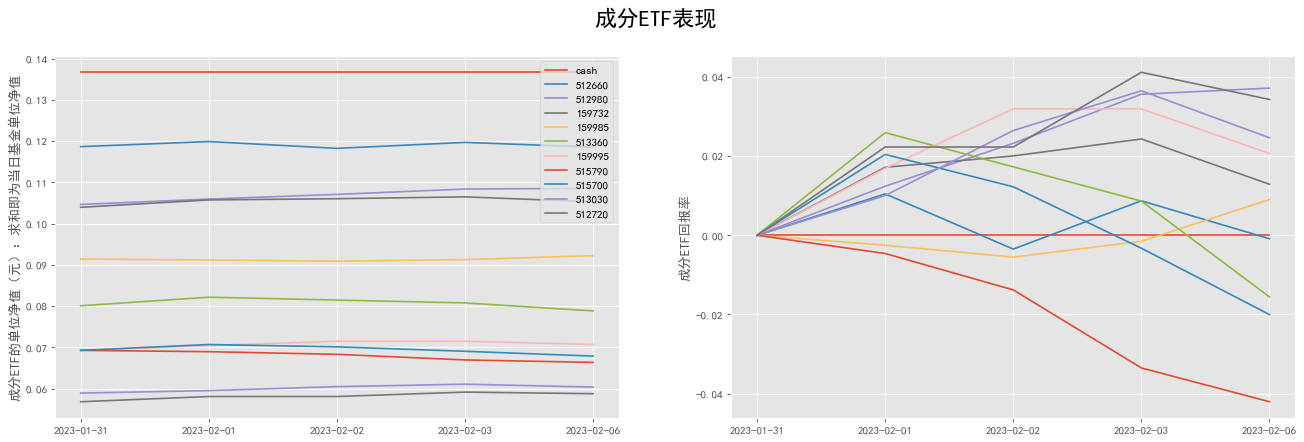

In [17]:
pt = df.T.sort_values(startdate,ascending=False).iloc[:11].T
fig = plt.figure(figsize=[20,6],dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('成分ETF的单位净值（元）：求和即为当日基金单位净值')
for i in pt.columns:
    ax1.plot(pt[i],label=i)
    
ax1.legend()
ax2=plt.subplot(122)
ax2.plot((pt/pt.iloc[0])-1)
ax2.set_ylabel('成分ETF回报率')

fig.suptitle('成分ETF表现',fontsize=20)
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


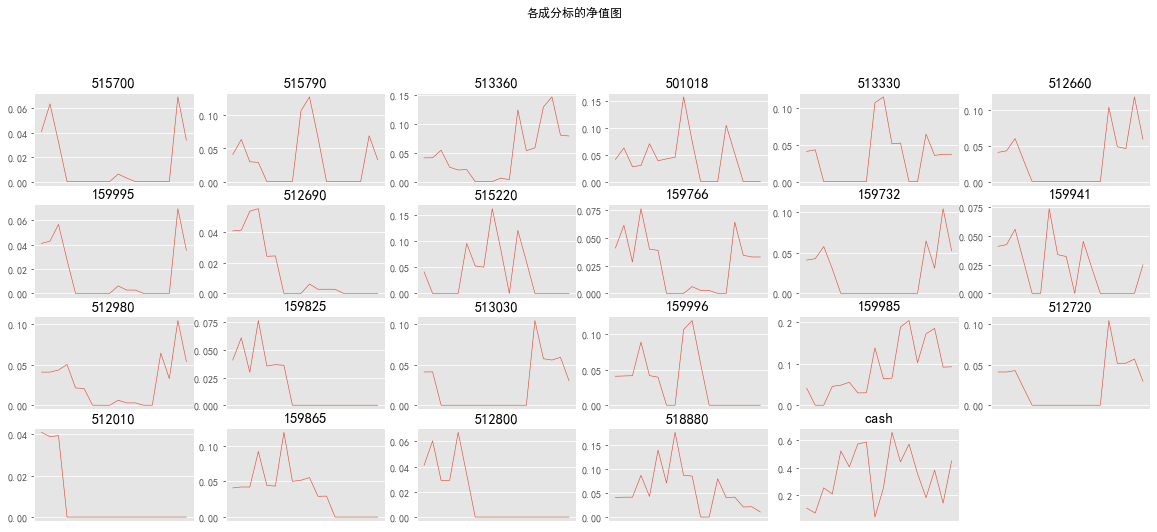

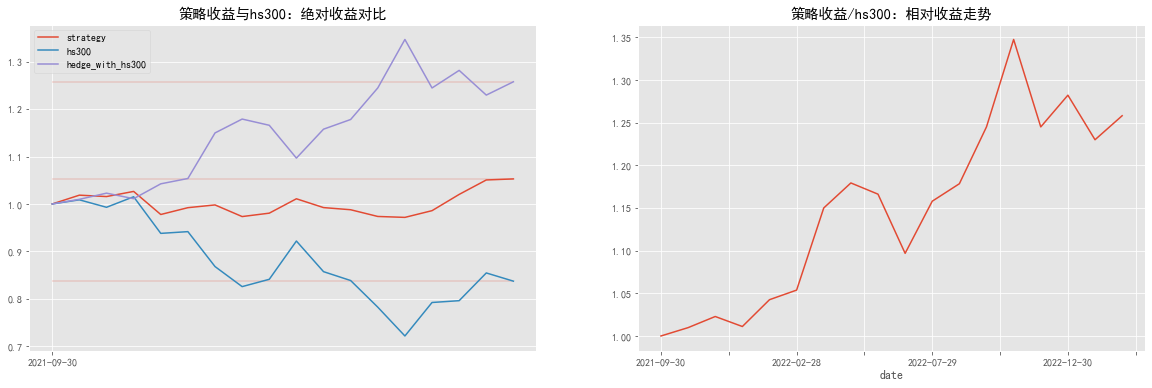

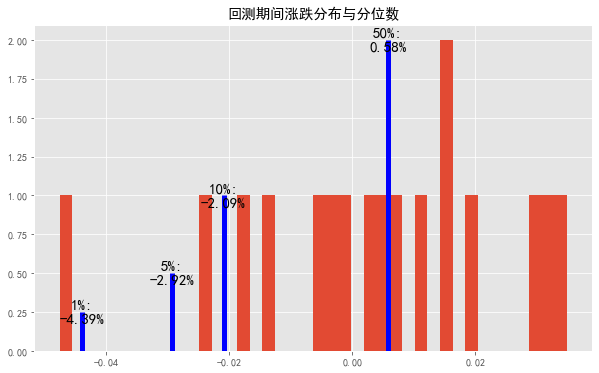

近5日组合净值：
date
2022-10-31    0.971615
2022-11-30     0.98581
2022-12-30    1.020145
2023-01-31    1.050691
2023-02-06      1.0529
dtype: object
近5日组合涨跌：
date
2022-10-31   -0.002002
2022-11-30    0.014610
2022-12-30    0.034830
2023-01-31    0.029943
2023-02-06    0.002102
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.426973  0.000000
159985  0.087566  0.008534
513360  0.074622 -0.019031
512660  0.056254 -0.001744
512980  0.051319  0.032558
159732  0.049653  0.005731
513330  0.035164 -0.002066
159995  0.033427  0.015977
515700  0.032094 -0.024530
515790  0.031409 -0.045365
159766  0.031215 -0.000927
513030  0.028649  0.023744
512720  0.027935  0.035193
159941  0.023605  0.048077
518880  0.010115 -0.013517
159825       0.0 -0.005568
515220       0.0 -0.012456
159865       0.0  0.007353
159996       0.0 -0.024545
512800       0.0 -0.029757
512010       0.0 -0.019493
501018       0.0 -0.015748
512690       0.0 -0.010011


In [36]:
am.visualization()

In [38]:
am.weight.iloc[-2].sort_values()

159941         0.0
512800         0.0
159865         0.0
501018         0.0
512010         0.0
512690         0.0
515220         0.0
159996         0.0
159825         0.0
518880    0.021591
159766    0.032897
513330    0.037101
512720    0.056826
513030    0.058929
515700    0.069284
159995    0.069284
515790    0.069284
513360    0.080093
159985    0.091418
159732    0.103964
512980     0.10466
512660    0.118666
cash      0.136693
Name: 2023-01-31, dtype: object